# 9 ÎπÑÏßÄÎèÑ ÌïôÏäµ
ÏûÖÎ†• Ï†ïÎ≥¥Îßå ÏÇ¨Ïö©ÌïòÎäî ÎπÑÏßÄÎèÑ ÌïôÏäµ

# 9.1 2Ï∞®Ïõê ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞
ÎπÑÏßÄÎèÑ ÌïôÏäµ Î¨∏Ï†úÎäî ÌÅ¥ÎûòÏä§ Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÏùå

ÌÅ¥Îü¨Ïä§ÌÑ∞: Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ÏóêÏÑú ÎπÑÏä∑Ìïú Ï†êÎÅºÎ¶¨ Î∂ÑÌè¨Î°ú ÎÇòÎàÑÏñ¥ Ìï†ÎãπÌïòÎäî Í≤É

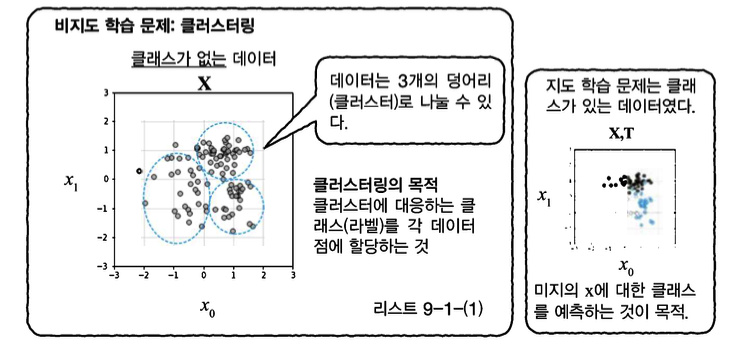

<ipython-input-2-b7f2aaefbfb8>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X[n, k] = (np.random.randn() * Sig[T3[n, :] == 1, k] + Mu[T3[n, :] == 1, k])


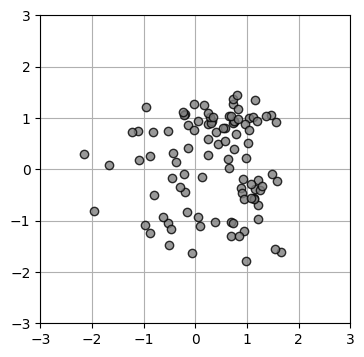

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1)
N = 100
K = 3
T3 = np.zeros((N, 3), dtype = np.uint8)
X  = np.zeros((N, 2))

X_range0 = [-3, 3]
X_range1 = [-3, 3]
X_col = ['cornflowerblue', 'black', 'white']

Mu  = np.array([[-.5, -.5], [.5, 1.0], [1, -.5]]) # Î∂ÑÌè¨Ïùò Ï§ëÏã¨
Sig = np.array([[.7, .7], [.8, .3], [.3, .8]]) # Î∂ÑÌè¨Ïùò Î∂ÑÏÇ∞
Pi  = np.array([0.4, 0.8, 1]) # ÎàÑÏ†Å ÌôïÎ•†

for n in range(N) :
  wk = np.random.rand()

  for k in range(K) :
    if wk < Pi[k] :
      T3[n, k] = 1
      break
  for k in range(2) :
    X[n, k] = (np.random.randn() * Sig[T3[n, :] == 1, k] + Mu[T3[n, :] == 1, k])

def show_data(x) :
  plt.plot(x[:, 0], x[:, 1], linestyle = 'none', marker = 'o', markersize = 6, markeredgecolor = 'black', color = 'gray', alpha = 0.8)
  plt.grid(True)

plt.figure(1, figsize = (4, 4))
show_data(X)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.show()
np.savez('data_ch9.npz', X = X, X_range0 = X_range0, X_range1 = X_range1)


K-means Í∏∞Î≤ïÍ≥º Í∞ÄÏö∞ÏãúÏïà ÌòºÌï© Î™®Îç∏ÏùÑ ÏÇ¨Ïö©Ìïú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏùÑ ÌïôÏäµ

# 9.2 K-means Í∏∞Î≤ï

# 9.2.1 K-means Í∏∞Î≤ïÏùò Í∞úÏöî

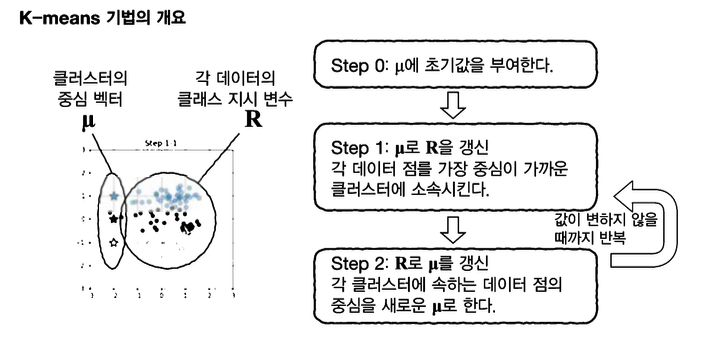

K-means, Í∞ÄÏö∞ÏãúÏïà ÌòºÌï© Î™®Îç∏ Î™®Îëê ÎØ∏Î¶¨ Î∂ÑÌï†Ìï† ÌÅ¥Îü¨Ïä§ÌÑ∞Ïùò Ïàò
$K$Î•º Í≤∞Ï†ïÌï¥Ïïº Ìï®

K-means
- ÌÅ¥Îü¨Ïä§ÌÑ∞Ïùò Ï§ëÏã¨ Î≤°ÌÑ∞ $\mu$: ÌÅ¥Îü¨Ïä§ÌÑ∞Ïùò Ï§ëÏã¨ ÏúÑÏπòÎ•º ÎÇòÌÉÄÎÉÑ
- ÌÅ¥ÎûòÏä§ ÏßÄÏãú Î≥ÄÏàò **R**: Í∞Å Îç∞Ïù¥ÌÑ∞ Ï†êÏù¥ Ïñ¥Îñ§ ÌÅ¥Îü¨Ïä§ÌÑ∞Ïù∏ ÏßÄ

- step0: Ï§ëÏã¨ Î≤°ÌÑ∞Ïóê Ï†ÅÏ†àÌïú Í∞í Ï†úÍ≥µ -> Ï§ëÏã¨ Ïû†Ï†ïÏ†Å Í≤∞Ï†ï
- step1: ÌòÑ ÏãúÏ†ê Ï§ëÏã¨ Î≤°ÌÑ∞Î•º Î∞îÌÉïÏúºÎ°ú ÌÅ¥ÎûòÏä§ ÏßÄÏãú Î≥ÄÏàò Í≤∞Ï†ï
- step2: ÌòÑ ÏãúÏ†êÏóêÏÑú ÌÅ¥ÎûòÏä§ ÏßÄÏãú Î≥ÄÏàòÎ°ú Ï§ëÏã¨ Î≤°ÌÑ∞ Í∞±Ïã†

Ïù¥ÌõÑ step1,step2 Î∞òÎ≥µ -> $\mu$, **R** Í∞±Ïã†
-> ÏñëÏûêÏùò Í∞íÏù¥ Î≥ÄÌôî x -> Ï¢ÖÎ£å

# 9.2.2 Step 0: Î≥ÄÏàòÏùò Ï§ÄÎπÑÏôÄ Ï¥àÍ∏∞Ìôî
Ï§ëÏã¨ Î≤°ÌÑ∞:

$\mu_k = [\mu_{k0},\mu_{k1}]$

ÏûÖÎ†•: 2Ï∞®Ïõê -> Ï§ëÏã¨: 2Ï∞®Ïõê

Ï†ÅÎãπÌïú Ï¥àÍ∏∞Í∞í Ìï†Îãπ

ÌÅ¥ÎûòÏä§ ÏßÄÏãú Î≥ÄÏàò RÏùÄ 1, 0 Îç∞Ïù¥ÌÑ∞ $n$Ïù¥ $k$Ïóê ÏÜçÌïòÎäî Í≤ΩÏö∞,
ÏÜçÌïòÏßÄ ÏïäÎäî Í≤ΩÏö∞

one-hot-coding ÏÉÅÌÉúÎ°ú ÎÇòÌÉÄÎÇ¥Î©∞

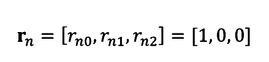

ÌñâÎ†¨Î°ú ÎÇòÌÉÄÎÇ¥Î©¥

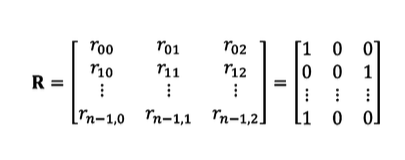

In [3]:
Mu = np.array([[-2, 1], [-2, 0], [-2, -1]])
R = np.c_[np.ones((N, 1), dtype = int), np.zeros((N, 2), dtype = int)]

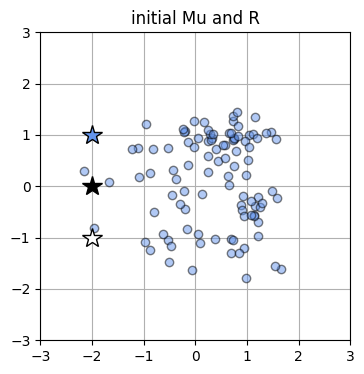

In [4]:
def show_prm(x, r, mu, col):
    for k in range(K):
        # Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨Ïùò Î¨òÏÇ¨
        plt.plot(x[r[:, k] == 1, 0], x[r[:, k] == 1, 1],
                 marker='o',
                 markerfacecolor=X_col[k], markeredgecolor='k',
                 markersize=6, alpha=0.5, linestyle='none')
        # Îç∞Ïù¥ÌÑ∞Ïùò ÌèâÍ∑†ÏùÑ "Î≥ÑÌëú"Î°ú Î¨òÏÇ¨
        plt.plot(mu[k, 0], mu[k, 1], marker='*',
                 markerfacecolor=X_col[k], markersize=15,
                 markeredgecolor='k', markeredgewidth=1)
    plt.xlim(X_range0)
    plt.ylim(X_range1)
    plt.grid(True)

plt.figure(figsize=(4, 4))
R = np.c_[np.ones((N, 1)), np.zeros((N, 2))]
show_prm(X, R, Mu, X_col)
plt.title('initial Mu and R')
plt.show()

# 9.2.3 Step 1: RÏùò Í∞±Ïã†
**R**Í∞±Ïã† Î∞©Î≤ï:

"Í∞Å Îç∞Ïù¥ÌÑ∞ Ï†êÏùÑ Í∞ÄÏû• Ï§ëÏã¨Ïù¥ Í∞ÄÍπåÏö¥ ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê ÎÑ£ÎäîÎã§."

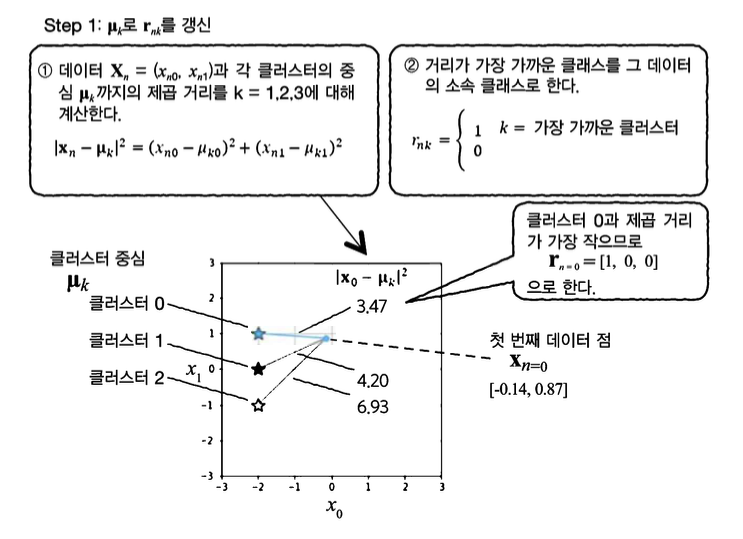

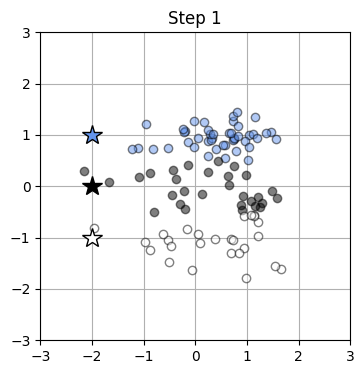

In [5]:
def step1_kmeans(x0, x1, mu):
    N = len(x0)
    r = np.zeros((N, K))
    for n in range(N):
        wk = np.zeros(K)
        for k in range(K):
            wk[k] = (x0[n] - mu[k, 0])**2 + (x1[n] - mu[k, 1])**2
        r[n, np.argmin(wk)] = 1
    return r

plt.figure(figsize=(4, 4))
R = step1_kmeans(X[:, 0], X[:, 1], Mu)
show_prm(X, R, Mu, X_col)
plt.title('Step 1')
plt.show()

# 9.2.4 Step 2: ùúáÏùò Í∞±Ïã†
ùúáÍ∞±Ïã† Î∞©Î≤ï:

"Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê ÏÜçÌïòÎäî Îç∞Ïù¥ÌÑ∞ Ï†êÏùò Ï§ëÏã¨ÏùÑ ÏÉàÎ°úÏö¥ ùúáÎ°ú ÌïúÎã§."
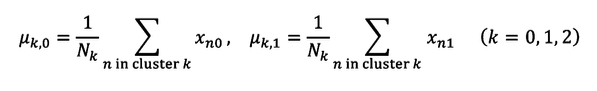

In [6]:
def step2_kmeans(x0, x1, r):
    mu = np.zeros((K, 2))
    for k in range(K):
        mu[k, 0] = np.sum(r[:, k] * x0) / np.sum(r[:, k])
        mu[k, 1] = np.sum(r[:, k] * x1) / np.sum(r[:, k])
    return mu

plt.figure(figsize=(4, 4))
Mu = step2_kmeans(X[:, 0], X[:, 1], R)
show_prm(X, R, Mu, X_col)
plt.title('Step2')
plt.show()

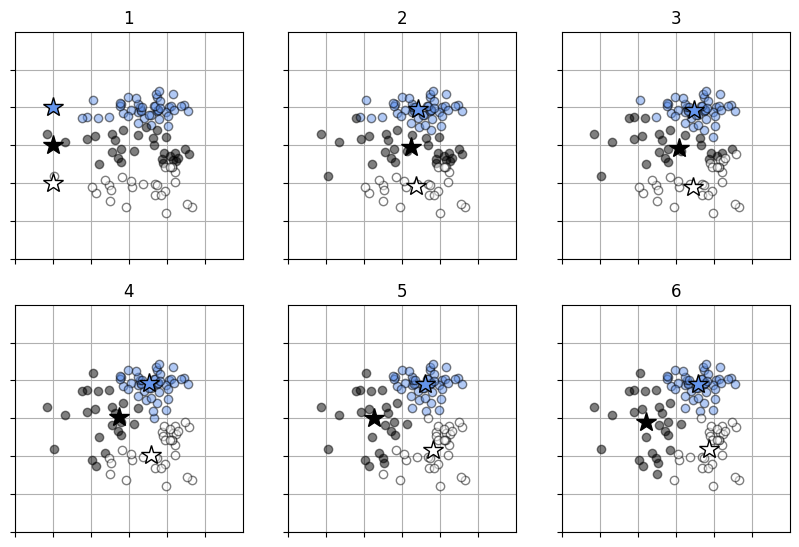

In [7]:
plt.figure(1, figsize=(10, 6.5))
Mu = np.array([[-2, 1], [-2, 0], [-2, -1]])
max_it = 6 # Î∞òÎ≥µ ÌöüÏàò
for it in range(0, max_it):
    plt.subplot(2, 3, it + 1)
    R = step1_kmeans(X[:, 0], X[:, 1], Mu)
    show_prm(X, R, Mu, X_col)
    plt.title("{0:d}".format(it + 1))
    plt.xticks(range(X_range0[0], X_range0[1]), "")
    plt.yticks(range(X_range1[0], X_range1[1]), "")
    Mu = step2_kmeans(X[:, 0], X[:, 1], R)
plt.show()

# 9.2.5 ÏôúÍ≥° Ï≤ôÎèÑ
K-means Ïùò Í≤ΩÏö∞ Îç∞Ïù¥ÌÑ∞ Ï†êÏù¥ ÏÜçÌïú ÌÅ¥Îü¨Ïä§ÌÑ∞Ïùò Ï§ëÏã¨ÍπåÏßÄÏùò Ï†úÍ≥± Í±∞Î¶¨Î•º Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î°ú Ìï©Ìïú Í≤ÉÏù¥ Î™©Ï†ÅÌï®ÏàòÏóê ÎåÄÏùëÌïòÍ≥†, ÏôúÍ≥° Ï≤ôÎèÑ distortion measureÎùºÍ≥† Ìï®

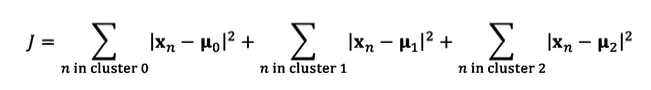

image.png

$r_{nk}$Îäî Îç∞Ïù¥ÌÑ∞ $n$Ïù¥ ÏÜçÌïú ÌÅ¥Îü¨Ïä§ÌÑ∞ÏóêÏÑúÎäî 1, ÏÜçÌïòÏßÄ ÏïäÎäî ÌÅ¥Îü¨Ïä§ÌÑ∞ÏóêÏÑúÎäî 0Ïù¥ ÎêòÎäî Î≥ÄÏàòÎùºÎäî ÏÇ¨Ïã§ÏùÑ Ïù¥Ïö©Ìï¥

image.png

In [8]:
def distortion_measure(x0, x1, r, mu):
    # ÏûÖÎ†•ÏùÄ 2Ï∞®ÏõêÏúºÎ°ú Ï†úÌïúÌïòÍ≥† ÏûàÎã§
    N = len(x0)
    J = 0
    for n in range(N):
        for k in range(K):
            J = J + r[n, k] * ((x0[n] - mu[k, 0])**2
                               + (x1[n] - mu[k, 1])**2)
    return J
# ---- test
# ---- MuÏôÄ RÏùò Ï¥àÍ∏∞Ìôî
Mu = np.array([[-2, 1], [-2, 0], [-2, -1]])
R = np.c_[np.ones((N, 1), dtype=int), np.zeros((N, 2), dtype=int)]
distortion_measure(X[:, 0], X[:, 1], R, Mu)

771.7091170334878

[627.54  73.39  70.39  57.59  48.31  47.28  46.86  46.86  46.86  46.86]


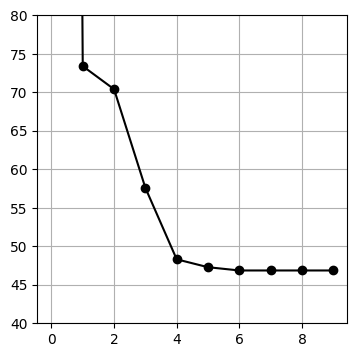

In [9]:
N=X.shape[0]
K=3
Mu = np.array([[-2, 1], [-2, 0], [-2, -1]])
R = np.c_[np.ones((N, 1), dtype=int), np.zeros((N, 2), dtype=int)]
max_it = 10
it = 0
DM = np.zeros(max_it) # ÏôúÍ≥° Ï≤ôÎèÑÏùò Í≥ÑÏÇ∞ Í≤∞Í≥ºÎ•º ÎÑ£ÎäîÎã§
for it in range(0, max_it): # K-means Î≤ï
    R = step1_kmeans(X[:, 0], X[:, 1], Mu)
    DM[it] = distortion_measure(X[:, 0], X[:, 1], R, Mu) # ÏôúÍ≥° Ï≤ôÎèÑ
    Mu = step2_kmeans(X[:, 0], X[:, 1], R)
print(np.round(DM, 2))
plt.figure(2, figsize=(4, 4))
plt.plot(DM, color='black', linestyle='-', marker='o')
plt.ylim(40, 80)
plt.grid(True)
plt.show()

ÏôúÍ≥° Ï≤ôÎèÑÏóê ÎåÄÌïú Í∑∏Î¶º step6ÏóêÏÑú ÏàòÎ†¥.

K-meansÏùò Î¨∏Ï†úÎäî Ï¥àÍ∏∞Í∞íÏóê ÏùòÏ°¥ÏÑ± Ï°¥Ïû¨.

Ï¥àÍ∏∞Í∞íÏóê Îî∞Îùº Í≤∞Í≥ºÍ∞Ä Îã¨ÎùºÏßà Ïàò ÏûàÏùå

Îã§ÏñëÌïú Ï¥àÍ∏∞Í∞íÏóêÏÑú ÏãúÏûëÌï¥ ÏñªÏùÄ Í≤∞Í≥º Ï§ëÏóê Í∞ÄÏû• ÏôúÍ≥° Ï≤ôÎèÑÍ∞Ä ÏûëÏùÄ Í≤∞Í≥ºÎ•º ÏÇ¨Ïö©ÌïòÎ©¥ Îê®

# 9.3 Í∞ÄÏö∞ÏãúÏïà ÌòºÌï© Î™®Îç∏

# 9.3.1 ÌôïÎ•†Ï†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
K-meansÎäî Îç∞Ïù¥ÌÑ∞ Ï†êÏùÑ Î∞òÎìúÏãú ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê Ìï†Îãπ -> ÌÅ¥Îü¨Ïä§ÌÑ∞ 0Ïùò Ï§ëÏã¨Ïóê ÏûàÎäî Îç∞Ïù¥ÌÑ∞, ÌÅ¥Îü¨Ïä§ÌÑ∞ 0 ÎÅùÏóê ÏûàÎäî Îç∞Ïù¥ÌÑ∞ ÎèôÏùºÌïú ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê Ìï†ÎãπÎê®

image.png

K-means Í∏∞Î≤ïÏóê ÌôïÎ•†Ïùò Í∞úÎÖêÏùÑ ÎèÑÏûÖÌï¥ ÌôïÏû•
ÌÅ¥ÎûòÏä§ Î≥ÄÏàòÎ•º Îã§ ÎçîÌïòÎ©¥ 1

Í¥ÄÏ∞∞ÏùÄ Î™ªÌñàÏßÄÎßå Îç∞Ïù¥ÌÑ∞Ïóê ÏòÅÌñ•ÏùÑ Ï§Ä Î≥ÄÏàòÎ•º Ïû†Ïû¨ Î≥ÄÏàò ÎòêÎäî Ïà®ÏùÄ Î≥ÄÏàò Hidden variableÏù¥Îùº Ìï®

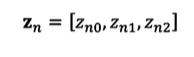

Í¥ÄÏ∞∞Ìï† Ïàò ÏóÜÎäî **Z**Ïùò Ï∂îÏ†ïÏπòÍ∞Ä $\gamma$Ïù¥Îã§.

**Z**Îäî 0ÎòêÎäî 1Ïùò Í∞íÏùÑ Í∞ñÏßÄÎßå $\gamma$Îäî ÌôïÎ•†Ï†ÅÏù∏ Ï∂îÏ†ïÍ∞íÏù¥ÎØÄÎ°ú 0~1Ïùò Ïã§Ïàò Í∞íÏùÑ Ï∑®Ìï®.

Ïù¥ $\gamma$Îäî Î∂ÄÎã¥Î•† responsibilityÎùºÍ≥† Ìï®

Ï†ïÎ¶¨ÌïòÎ©¥ ÌôïÎ•†Ï†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏùÄ Îç∞Ïù¥ÌÑ∞Ïùò Î∞∞ÌõÑÏóê Ïà®Ïñ¥ ÏûàÎäî Ïû†Ïû¨ Î≥ÄÏàò **Z**Î•º ÌôïÎ•†Ï†ÅÏúºÎ°ú $\gamma$ÏúºÎ°ú Ï∂îÏ†ïÌïòÎäî Í≤É

# 9.3.2 Í∞ÄÏö∞ÏãúÏïà ÌòºÌï© Î™®Îç∏
Î∂ÄÎã¥Î•† $\gamma$Î•º Íµ¨ÌïòÍ∏∞ ÏúÑÌïú Í∞ÄÏö∞ÏãúÏïà ÌòºÌï© Î™®Îç∏ ÌôïÎ•† Î™®Îç∏

image.png

Í∞ÄÏö∞ÏãúÏïà ÌòºÌï© Î™®Îç∏ÏùÄ 2Ï∞®Ïõê Í∞ÄÏö∞Ïä§ Ìï®Ïàò Ïó¨Îü¨ Í∞úÎ•º Ìï©Ïπú Í≤É

image.png

ÌèâÍµ∞ Í≥µÎ∂ÑÏÇ∞ ÌñâÎ†¨Ïùò 2Ï∞®Ïõê Í∞ÄÏö∞Ïä§ Ìï®ÏàòÎ•º ÎÇòÌÉÄÎÉÑ

ÏÑúÎ°ú Îã§Î•∏ ÌèâÍ∑†Í≥º Í≥µÎ∂ÑÏÇ∞ ÌñâÎ†¨ÏùÑ Í∞ÄÏßÑ 2Ï∞®Ïõê Í∞ÄÏö∞Ïä§ Ìï®ÏàòÍ∞Ä $K$Í∞ú Í≤πÏπú Î∂ÑÌè¨Î•º ÎÇòÌÉÄÎÉÑ

In [10]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [11]:
import numpy as np

wk = np.load('data_ch9.npz')
X = wk['X']
X_range0 = wk['X_range0']
X_range1 = wk['X_range1']

In [14]:
#Í∞ÄÏö∞Ïä§ Ìï®Ïàò
def gauss(x, mu, sigma):
  N, D = x.shape
  c1 = 1 / (2 * np.pi)**(D / 2)
  c2 = 1 / (np.linalg.det(sigma)**(1 / 2))
  inv_sigma = np.linalg.inv(sigma)
  c3 = x - mu
  c4 = np.dot(c3, inv_sigma)
  c5 = np.zeros(N)
  for d in range(D):
      c5 = c5 + c4[:, d] * c3[:, d]
  p = c1 * c2 * np.exp(-c5 / 2)
  return p

In [15]:
x = np.array([[1, 2], [2, 1], [3, 4]])
mu = np.array([1, 2])
sigma = np.array([[1, 0], [0, 1]])
print(gauss(x, mu, sigma))

[0.15915494 0.05854983 0.00291502]


In [16]:
def mixgauss(x, pi, mu, sigma):
  N, D = x.shape
  K = len(pi)
  p = np.zeros(N)
  for k in range(K):
    p = p + pi[k] * gauss(x, mu[k, :], sigma[k, :, :])
  return p

In [17]:
x = np.array([[1, 2], [2, 2], [3, 4]])
pi = np.array([0.3, 0.7])
mu = np.array([[1, 1], [2, 2]])
sigma = np.array([[[1, 0], [0, 1]], [[2, 0], [0, 1]]])
print(mixgauss(x, pi, mu, sigma))

[0.09031182 0.09634263 0.00837489]


In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
# ÌòºÌï© Í∞ÄÏö∞Ïä§ Îì±Í≥†ÏÑ† ÌëúÏãú
def show_contour_mixgauss(pi, mu, sigma):
  xn = 40 # Îì±Í≥†ÏÑ† ÌëúÏãú Ìï¥ÏÉÅÎèÑ
  x0 = np.linspace(X_range0[0], X_range0[1], xn)
  x1 = np.linspace(X_range1[0], X_range1[1], xn)
  xx0, xx1 = np.meshgrid(x0, x1)
  x = np.c_[np.reshape(xx0, xn * xn, 'F'), np.reshape(xx1, xn * xn, 'F')]
  f = mixgauss(x, pi, mu, sigma)
  f = f.reshape(xn, xn)
  f = f.T
  plt.contour(x0, x1, f, 10, colors='gray')


# ÌòºÌï© Í∞ÄÏö∞Ïä§ 3D ÌëúÏãú
def show3d_mixgauss(ax, pi, mu, sigma):
  xn = 40 # Îì±Í≥†ÏÑ† ÌëúÏãú Ìï¥ÏÉÅÎèÑ
  x0 = np.linspace(X_range0[0], X_range0[1], xn)
  x1 = np.linspace(X_range1[0], X_range1[1], xn)
  xx0, xx1 = np.meshgrid(x0, x1)
  x = np.c_[np.reshape(xx0, xn * xn, 'F'), np.reshape(xx1, xn * xn, 'F')]
  f = mixgauss(x, pi, mu, sigma)
  f = f.reshape(xn, xn)
  f = f.T
  ax.plot_surface(xx0, xx1, f, rstride=2, cstride=2, alpha=0.3,
                  color='blue', edgecolor='black')

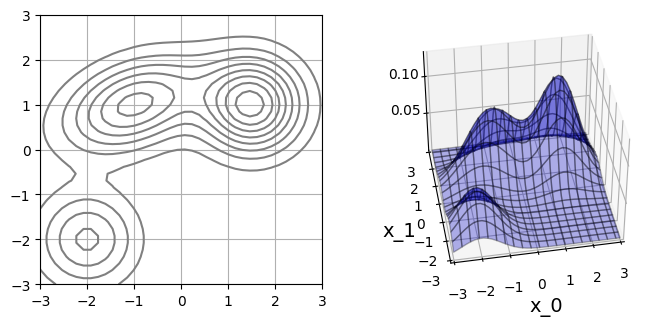

In [20]:
pi = np.array([0.2, 0.4, 0.4])
mu = np.array([[-2, -2], [-1, 1], [1.5, 1]])
sigma = np.array(
    [[[.5, 0], [0, .5]], [[1, 0.25], [0.25, .5]], [[.5, 0], [0, .5]]])

Fig = plt.figure(1, figsize=(8, 3.5))
Fig.add_subplot(1, 2, 1)
show_contour_mixgauss(pi, mu, sigma)
plt.grid(True)

Ax = Fig.add_subplot(1, 2, 2, projection='3d')
show3d_mixgauss(Ax, pi, mu, sigma)
Ax.set_zticks([0.05, 0.10])
Ax.set_xlabel('x_0', fontsize=14)
Ax.set_ylabel('x_1', fontsize=14)
Ax.view_init(40, -100)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.show()

# 9.3.3 EM ÏïåÍ≥†Î¶¨Ï¶òÏùò Í∞úÏöî
EM ÏïåÍ≥†Î¶¨Ï¶òÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Í∞ÄÏö∞ÏãúÏïà ÌòºÌï© Î™®Îç∏ÏùÑ Îç∞Ïù¥ÌÑ∞Ïóê ÌîºÌåÖÌï¥Î≥¥Í≥†,
Î∂ÄÎã¥Î•†ÏùÑ Íµ¨ÌïòÎäî Î∞©Î≤ïÏùÑ ÏÑ´Î™Ö

image.png

Í∞ÄÏö∞ÏãúÏïà ÌòºÌï© Î™®Îç∏ÏùÄ Ï§ëÏã¨ Î≤°ÌÑ∞ $\mu$, Í≥µÎ∂ÑÏÇ∞ ÌñâÎ†¨ $\sum$Ïóê ÏùòÌï¥ Í∞Å ÌÅ¥ÎûòÏä§ÌÑ∞Ïùò ÌôïÏÇ∞ Ï†ïÎèÑÎ•º Í∏∞Ïà†

ÏïåÍ≥†Î¶¨Ï¶ò:
- step0: $\pi, \mu, \sum$ Ï¥àÍ∏∞Ìôî
- step1: ÌòÑÏãúÏ†êÏùò $\pi, \mu, \sum$Î•º ÏÇ¨Ïö©ÌïòÏó¨ $\gamma$ Íµ¨Ìï® -> Ïù¥ stepÏùÄ EM ÏïåÍ≥†Î¶¨Ï¶òÏúºÎ°ú E-stepÏù¥ÎùºÌï®
- step2: ÌòÑÏãúÏ†êÏùò $\gamma$Î•º ÏÇ¨Ïö©Ìï¥ $\pi, \mu, \sum$Î•º Íµ¨Ìï® -> M step
- E step M stepÏùÑ ÏàòÎ†¥ÍπåÏßÄ Î∞òÎ≥µ

# 9.3.4 Step 0: Î≥ÄÏàòÏùò Ï§ÄÎπÑ Î∞è Ï¥àÍ∏∞Ìôî

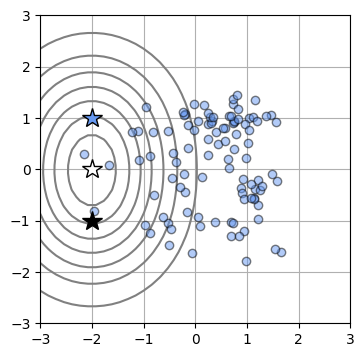

In [21]:
N = X.shape[0]
K = 3
Pi = np.array([0.33, 0.33, 0.34])
Mu = np.array([[-2, 1], [-2, 0], [-2, -1]])
Sigma = np.array([[[1, 0], [0, 1]], [[1, 0], [0, 1]], [[1, 0], [0, 1]]])
Gamma = np.c_[np.ones((N, 1)), np.zeros((N, 2))]

X_col=np.array([[0.4, 0.6, 0.95], [1, 1, 1], [0, 0, 0]])

def show_mixgauss_prm(x, gamma, pi, mu, sigma):
    N, D = x.shape
    show_contour_mixgauss(pi, mu, sigma)
    for n in range(N):
        col=gamma[n,0]*X_col[0]+gamma[n,1]*X_col[1]+gamma[n,2]*X_col[2]
        plt.plot(x[n, 0], x[n, 1], 'o',
                 color=tuple(col), markeredgecolor='black',
                 markersize=6, alpha=0.5)
    for k in range(K):
        plt.plot(mu[k, 0], mu[k, 1], marker='*',
                 markerfacecolor=tuple(X_col[k]), markersize=15,
                 markeredgecolor='k', markeredgewidth=1)


    plt.grid(True)

plt.figure(1, figsize=(4, 4))
show_mixgauss_prm(X, Gamma, Pi, Mu, Sigma)
plt.show()

# 9.3.5 Step 1(E Step): ùõæÍ∞±Ïã†
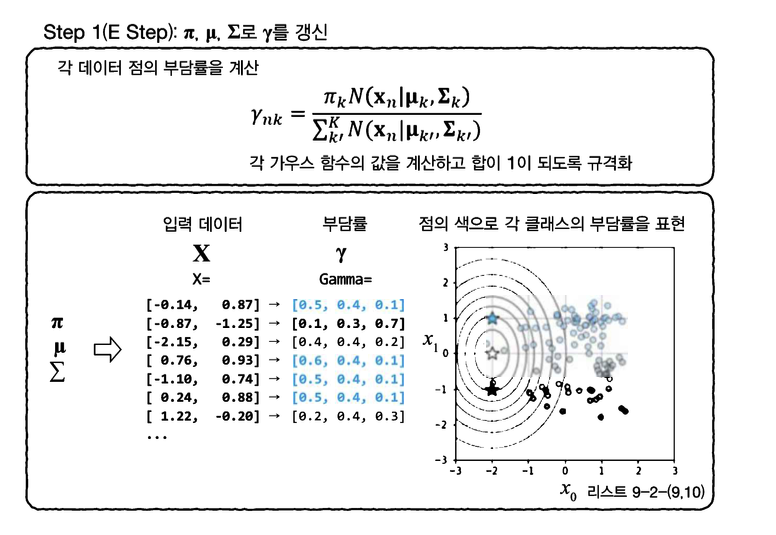

Î∂ÄÎã¥Î•† $\gamma$Î•º Î™®Îì† $n$Í≥º $k$Ïóê ÎåÄÌï¥ Í∞±Ïã†

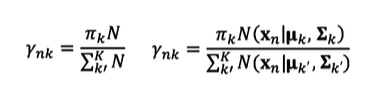

'Í∞ÄÏö∞Ïä§ Ìï®ÏàòÏùò Í∞íÏù¥ ÎÜíÏùÑÏàòÎ°ù Î∂ÄÎã¥Î•†ÎèÑ ÎÜíÏïÑÏßÑÎã§.'
Îäî ÏßÅÍ¥ÄÏ†ÅÏù∏ Í∞±Ïã† Î∞©Î≤ï

In [22]:
def e_step_mixgauss(x, pi, mu, sigma):
  N, D = x.shape
  K = len(pi)
  y = np.zeros((N, K))
  for k in range(K):
    y[:, k] = gauss(x, mu[k, :], sigma[k, :, :]) # KxN
  gamma = np.zeros((N, K))
  for n in range(N):
    wk = np.zeros(K)
    for k in range(K):
      wk[k] = pi[k] * y[n, k]
    gamma[n, :] = wk / np.sum(wk)
  return gamma

Gamma = e_step_mixgauss(X, Pi, Mu, Sigma)

In [23]:
plt.figure(1, figsize=(4, 4))
show_mixgauss_prm(X, Gamma, Pi, Mu, Sigma)
plt.show()

# 9.3.6 Step 2(M Step): ùúã,ùúá,‚àëÏùò Í∞±Ïã†
Ïö∞ÏÑ† Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê ÎåÄÌïú Î∂ÄÎã¥Î•†Ïúº Ìï© $N_k$Î•º Íµ¨Ìï®

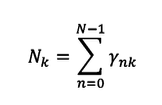

ÏúÑ ÏãùÏùÑ Î∞îÌÉïÏúºÎ°ú ÌòºÌï©Î•† $\pi_k$Î•º Í∞±Ïã†

image.png

$N$ ÏùÄ Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Ïàò Ïù¥ÎØÄÎ°ú ÌòºÌï©Î•†ÏùÄ Ï†ÑÏ≤¥Ïóê ÎåÄÌïú ÌÅ¥Îü¨Ïä§ÌÑ∞ ÎÇ¥ ÏàòÏùò ÎπÑÏú®Ïù¥ ÎêòÎäî, Ï†ÅÌï©Ìïú Í∞±Ïã†Ïãù

Í∑∏Î¶¨Í≥† Ï§ëÏã¨ Î≤°ÌÑ∞ $\mu_k$Î•º Í∞±Ïã†

image.png

ÎßàÏßÄÎßâÏúºÎ°ú Í∞ÄÏö∞Ïä§Ïùò Í≥µÎ∂ÑÏÇ∞ ÌñâÎ†¨ÏùÑ Í∞±Ïã†

image.png

ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê Î∂ÄÎã¥Î•†Ïùò Í∞ÄÏ§ëÏπòÎ•º ÎçîÌïú Îç∞Ïù¥ÌÑ∞Ïùò Í≥µÎ∂ÑÏÇ∞ ÌñâÎ†¨ÏùÑ Íµ¨ÌïòÎäî Í≤ÉÏù¥Î©∞, Í∞ÄÏö∞Ïä§ Ìï®ÏàòÎ•º Îç∞Ïù¥ÌÑ∞Ïóê ÌîºÌåÖÌï† ÎïåÏùò Í≥µÎ∂ÑÏÇ∞ ÌñâÎ†¨ÏùÑ Íµ¨ÌïòÎäî Î∞©Î≤ïÍ≥º Ïú†ÏÇ¨

In [24]:
def m_step_mixgauss(x, gamma):
  N, D = x.shape
  N, K = gamma.shape
  # piÎ•º Í≥ÑÏÇ∞
  pi = np.sum(gamma, axis=0) / N
  # muÏùÑ Í≥ÑÏÇ∞
  mu = np.zeros((K, D))
  for k in range(K):
    for d in range(D):
      mu[k, d] = np.dot(gamma[:, k], x[:, d]) / np.sum(gamma[:, k])
  # sigmaÎ•º Í≥ÑÏÇ∞
  sigma = np.zeros((K, D, D))
  for k in range(K):
    for n in range(N):
      wk = x - mu[k, :]
      wk = wk[n, :, np.newaxis]
      sigma[k, :, :] = sigma[k, :, :] + gamma[n, k] * np.dot(wk, wk.T)
    sigma[k, :, :] = sigma[k, :, :] / np.sum(gamma[:, k])
  return pi, mu, sigma
Pi, Mu, Sigma = m_step_mixgauss(X, Gamma)

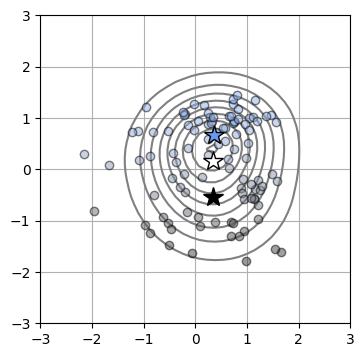

In [25]:
plt.figure(1, figsize=(4, 4))
show_mixgauss_prm(X, Gamma, Pi, Mu, Sigma)
plt.show()

In [26]:
Pi = np.array([0.3, 0.3, 0.4])
Mu = np.array([[2, 2], [-2, 0], [2, -2]])
Sigma = np.array([[[1, 0], [0, 1]], [[1, 0], [0, 1]], [[1, 0], [0, 1]]])
Gamma = np.c_[np.ones((N, 1)), np.zeros((N, 2))]
plt.figure(1, figsize=(10, 6.5))
max_it = 20 # Î∞òÎ≥µ ÌöüÏàò

i_subplot=1;
for it in range(0, max_it):
  Gamma = e_step_mixgauss(X, Pi, Mu, Sigma)
  if it<4 or it>17:
    plt.subplot(2, 3, i_subplot)
    show_mixgauss_prm(X, Gamma, Pi, Mu, Sigma)
    plt.title("{0:d}".format(it + 1))
    plt.xticks(range(X_range0[0], X_range0[1]), "")
    plt.yticks(range(X_range1[0], X_range1[1]), "")
    i_subplot=i_subplot+1
  Pi, Mu, Sigma = m_step_mixgauss(X, Gamma)
plt.show()

# 9.3.7 Í∞ÄÎä•ÎèÑ
Í∞ÄÏö∞ÏãúÏïà ÌòºÌï© Î™®Îç∏ÏùÄ Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌè¨ $p(x)$Î•º ÎÇòÌÉÄÎÇ¥Îäî Î™®Îç∏.
Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ÏùÄ $p(t|x)$ÏôÄ xÏóê ÎåÄÌï¥ ÌÅ¥ÎûòÏä§Ïùò ÌôïÎ•†ÏùÑ ÎÇòÌÉÄÎÇ¥Îäî Î™®Îç∏Ïù¥ÏóàÍ∏∞ ÎïåÎ¨∏Ïóê, ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏóêÏÑú Ï∑®Í∏âÌïòÎäî Î™®Îç∏ÏùÄ Î∂ÑÎ•ò Î¨∏Ï†úÏóêÏÑú Îã§Î£¨ Î™®Îç∏Í≥ºÎäî Îã§Î•∏ Ïú†Ìòï.
Í∑∏Î¶¨Í≥† EM ÏïåÍ≥†Î¶¨Ï¶òÏùÄ Í∞ÄÏö∞ÏãúÏïà ÌòºÌï© Î™®Îç∏Ïù¥ ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ **X**Ïùò
Î∂ÑÌè¨Ïóê ÎßûÍ≤å Îß§Í∞ú Î≥ÄÏàòÎ•º Í∞±Ïã†ÌïòÎäî ÏïåÍ≥†Î¶¨Ï¶ò.
ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞Í∞Ä Ï°∞Î∞ÄÌïú Î∂ÄÎ∂ÑÏóê Í∞ÄÏö∞Ïä§ Ìï®ÏàòÍ∞Ä Î∞∞ÏπòÎêòÏñ¥, ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞Í∞Ä
Îõ∞ÏóÑÎõ∞ÏóÑÌïú Î∂ÄÎ∂ÑÏùÄ Î∂ÑÌè¨Ïùò Í∞íÏù¥ ÎÇÆÎèÑÎ°ù Îß§Í∞ú Î≥ÄÏàòÍ∞Ä Ï°∞Ï†ïÎêòÏóàÏùå.
Í∑∏ Í≤∞Í≥º, 'Í∞Å Í∞ÄÏö∞Ïä§ Î∂ÑÌè¨Í∞Ä Îã§Î•∏ ÌÅ¥Îü¨Ïä§ÌÑ∞Î•º ÎÇòÌÉÄÎÇ∏' Í≤É.

EM ÏïåÍ≥†Î¶¨Ï¶òÏùÄ **X**Í∞Ä ÏÉùÏÑ±Îêú ÌôïÎ•†(Í∞ÄÎä•ÎèÑ)Î•º ÏµúÏ†ÅÌôî Í∞ÄÏû• ÎÜíÎèÑÎ°ù Îß§Í∞úÎ≥ÄÏàòÍ∞Ä Í∞±Ïã†ÎêòÍ≥† ÏûàÏóàÏùå.

Í∞ÄÎä•ÎèÑÎÇò Î°úÍ∑∏ Í∞ÄÎä•ÎèÑÎ•º ÏµúÏ†ÅÌôîÏãúÌÇ¨ ÎïåÎäî Í∑πÎåÄÌôîÌïòÍ∏∞ ÎïåÎ¨∏Ïóê -1ÏùÑ Í≥±Ìïò ÏùåÏùò Î°úÍ∑∏ Í∞ÄÎä•ÎèÑ Ïò§Ï∞® Ìï®ÏàòÎ°ú Ï†ïÏùò

image.png

In [27]:
# ÌòºÌï© Í∞ÄÏö∞Ïä§Ïùò Î™©Ï†Å Ìï®Ïàò
def nlh_mixgauss(x, pi, mu, sigma):
    # x: NxD
    # pi: Kx1
    # mu: KxD
    # sigma: KxDxD
    # output lh: NxK
    N, D = x.shape
    K = len(pi)
    y = np.zeros((N, K))
    for k in range(K):
      y[:, k] = gauss(x, mu[k, :], sigma[k, :, :]) # KxN
    lh = 0
    for n in range(N):
      wk = 0
      for k in range(K):
        wk = wk + pi[k] * y[n, k]
      lh = lh + np.log(wk)
    return -lh

In [28]:
Pi = np.array([0.3, 0.3, 0.4])
Mu = np.array([[2, 2], [-2, 0], [2, -2]])
Sigma = np.array([[[1, 0], [0, 1]], [[1, 0], [0, 1]], [[1, 0], [0, 1]]])
Gamma = np.c_[np.ones((N, 1)), np.zeros((N, 2))]

max_it = 20
it = 0
Err = np.zeros(max_it) # distortion measure
for it in range(0, max_it):
  Gamma = e_step_mixgauss(X, Pi, Mu, Sigma)
  Err[it] = nlh_mixgauss(X,Pi,Mu,Sigma)
  Pi, Mu, Sigma = m_step_mixgauss(X, Gamma)

print(np.round(Err, 2))
plt.figure(2, figsize=(4, 4))
plt.plot(np.arange(max_it) + 1,
Err, color='k', linestyle='-', marker='o')
#plt.ylim([40, 80])
plt.grid(True)
plt.show()

[426.22 229.86 224.32 220.8  218.63 216.93 215.93 215.51 215.33 215.24
 215.18 215.15 215.13 215.11 215.1  215.1  215.09 215.09 215.08 215.08]


ÏùåÏùò Î°úÍ∑∏ Í∞ÄÎä•ÎèÑÎäî Ï†êÏ∞® Í∞êÏÜåÌï¥ step10Ï†ïÎèÑÏóêÏÑú ÎåÄÎ∂ÄÎ∂Ñ ÏàòÎ†¥Ìï®.
ÏùåÏùò Î°úÍ∑∏ Í∞ÄÎä•ÎèÑÎ•º Í≥ÑÏÇ∞ÌïòÎäî ÏïåÍ≥†Î¶¨Ï¶òÏù¥ Ï†ïÏÉÅ ÏûëÎèô, Î∞òÎ≥µ Í≥ÑÏÇ∞Ïùò Ï¢ÖÎ£å Ï°∞Í±¥ÏúºÎ°ú ÏÇ¨Ïö© Í∞ÄÎä•.